## Import libraries

In [1]:
from src.image_treatment import DataTransformation, TrainModel, Train_Transfer_Learning_Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
PATH = 'img/train/'
PATH_TEST = 'img/test/'

## Data Augmentation 

In [2]:
# First create a data generator
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.15,
                            zoom_range=0.1,
                            channel_shift_range=10,
                            horizontal_flip=True)

In [3]:
# declare our target classes and parameters for data augmentation
TARGETS = ['baseball', 'cricket', 'football']
RANG = 64
RANG = 10
dataugm = False



In [ ]:
# parameters for train and test data
SIZE = 128
# parameters for train the model
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
if dataugm == True:

    for target in TARGETS:
        DataTransformation.augment_data(path=PATH,
                                        datagen = datagen, 
                                        target = target,
                                        rang=RANG,
                                        augm=RANG)


## Prepare data

#### Split data train on Train-Test and transform images to array

In [5]:
X_train, X_test, Y_train, Y_test = DataTransformation.transform_data(path = PATH,
                                                                     classes = TARGETS,
                                                                     size = SIZE, 
                                                                     neural_network = True,
                                                                     test = False)

100%|██████████| 5498/5498 [00:23<00:00, 233.77it/s]


#### Transform the data test into an array

In [6]:
test = DataTransformation.transform_data(path = PATH_TEST, classes = [], 
                                            size = SIZE, test=True)

100%|██████████| 41/41 [00:00<00:00, 325.71it/s]


## Convolutional Network

### Train and fit the model

Epoch 1/10
410/410 [==============================] - 1592s 4s/step - loss: 1.1173 - accuracy: 0.5065 - f1_m: 0.3310 - recall_m: 0.2280 - precision_m: 0.7284
Epoch 2/10
410/410 [==============================] - 1570s 4s/step - loss: 0.6405 - accuracy: 0.7210 - f1_m: 0.6711 - recall_m: 0.5762 - precision_m: 0.8175
Epoch 3/10
410/410 [==============================] - 1558s 4s/step - loss: 0.3446 - accuracy: 0.8714 - f1_m: 0.8673 - recall_m: 0.8388 - precision_m: 0.8990
Epoch 4/10
410/410 [==============================] - 1556s 4s/step - loss: 0.1722 - accuracy: 0.9415 - f1_m: 0.9410 - recall_m: 0.9332 - precision_m: 0.9493
Epoch 5/10
410/410 [==============================] - 1530s 4s/step - loss: 0.1134 - accuracy: 0.9652 - f1_m: 0.9651 - recall_m: 0.9610 - precision_m: 0.9694
Epoch 6/10
410/410 [==============================] - 1531s 4s/step - loss: 0.0795 - accuracy: 0.9766 - f1_m: 0.9769 - recall_m: 0.9748 - precision_m: 0.9791
Epoch 7/10
410/410 [==============================] 

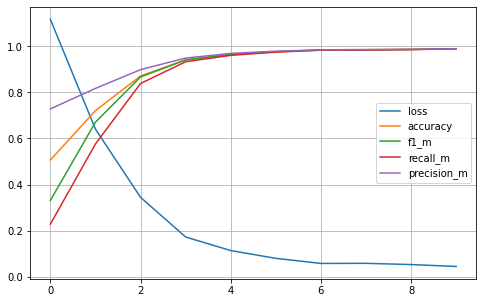

In [8]:
rnn = TrainModel(size=SIZE)

rnn_fit = rnn.fit_model(X_train, Y_train, 
                        X_test, Y_test, 
                        class_length =len(TARGETS), 
                        batch_size = BATCH_SIZE,
                        epochs=10)

### Make Predictions 

1/1 [==============================] - 0s 84ms/step


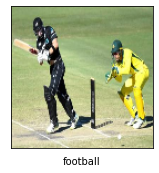

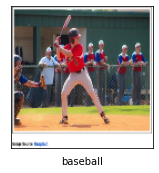

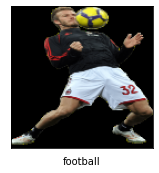

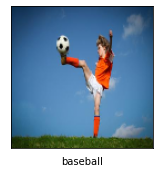

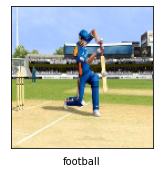

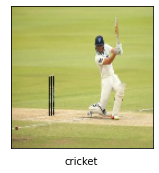

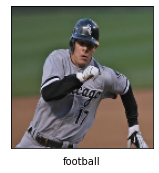

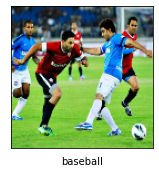

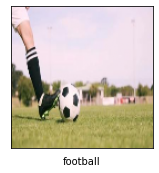

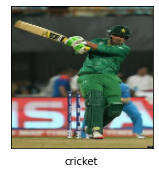

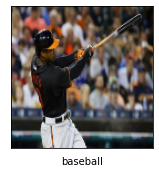

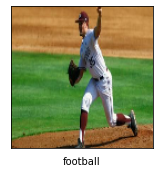

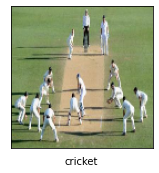

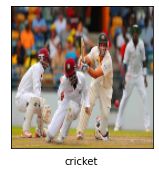

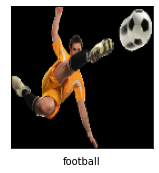

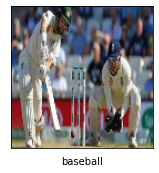

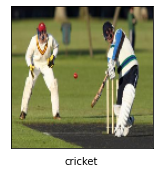

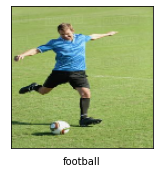

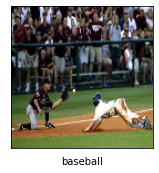

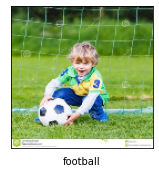

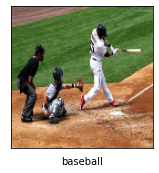

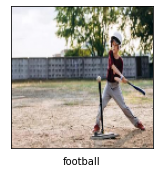

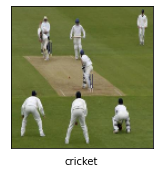

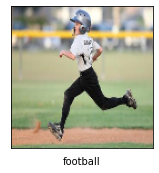

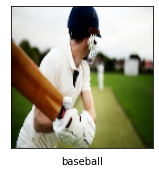

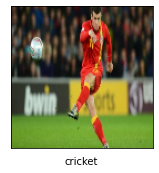

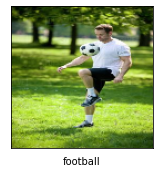

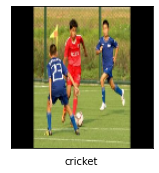

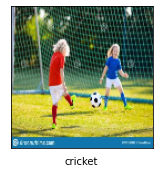

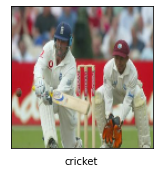

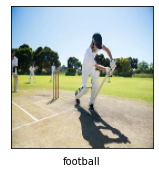

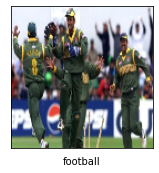

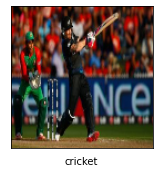

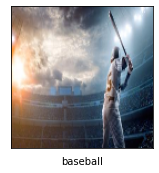

In [9]:
preds_rnn = rnn.predictions(test, TARGETS)

## Transfer Learning

In [10]:
tl_model = Train_Transfer_Learning_Model(size=SIZE, num_targets = len(TARGETS))

Epoch 1/10
410/410 [==============================] - 229s 555ms/step - loss: 0.1487 - acc: 0.9575 - f1_m: 0.9213 - recall_m: 0.9663 - precision_m: 0.8837
Epoch 2/10
410/410 [==============================] - 229s 560ms/step - loss: 0.0034 - acc: 0.9998 - f1_m: 0.9868 - recall_m: 0.9998 - precision_m: 0.9744
Epoch 3/10
410/410 [==============================] - 230s 562ms/step - loss: 5.7378e-04 - acc: 1.0000 - f1_m: 0.9931 - recall_m: 1.0000 - precision_m: 0.9866
Epoch 4/10
410/410 [==============================] - 231s 563ms/step - loss: 2.7065e-04 - acc: 1.0000 - f1_m: 0.9950 - recall_m: 1.0000 - precision_m: 0.9902
Epoch 5/10
410/410 [==============================] - 230s 561ms/step - loss: 1.7029e-04 - acc: 1.0000 - f1_m: 0.9955 - recall_m: 1.0000 - precision_m: 0.9912
Epoch 6/10
410/410 [==============================] - 241s 588ms/step - loss: 1.1546e-04 - acc: 1.0000 - f1_m: 0.9960 - recall_m: 1.0000 - precision_m: 0.9921
Epoch 7/10
410/410 [==============================] - 

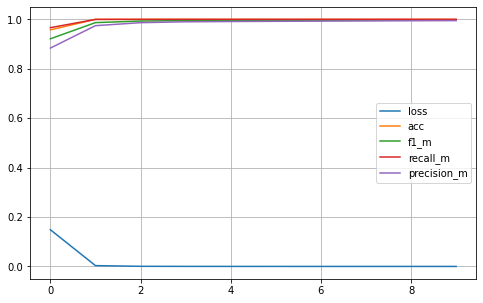

In [11]:
tl_model_fit = tl_model.fit_model(X_train, Y_train, 
                                  X_test, Y_test,
                                  batch_size = BATCH_SIZE,
                                  epochs= EPOCHS)

### Make Predictions 

1/1 [==============================] - 0s 41ms/step


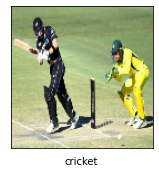

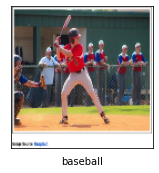

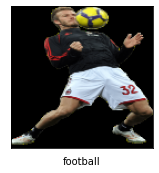

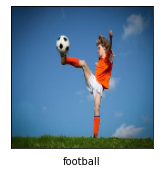

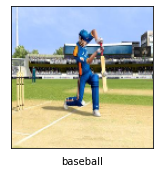

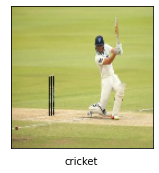

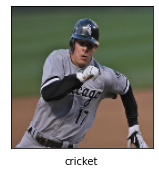

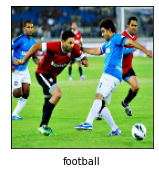

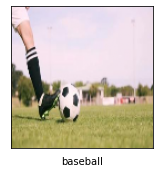

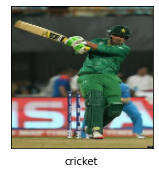

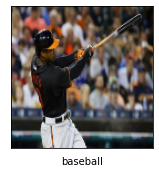

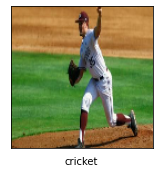

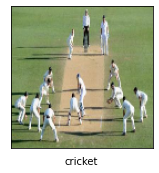

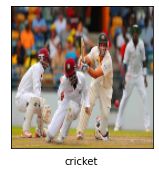

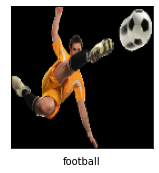

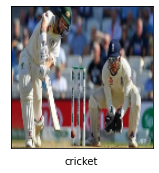

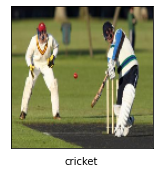

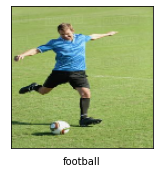

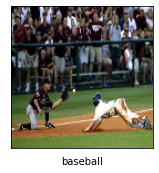

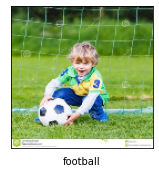

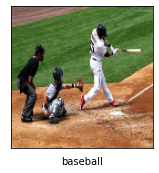

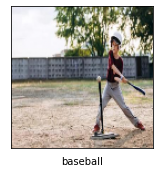

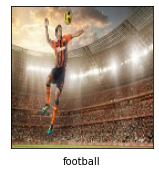

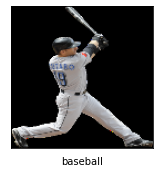

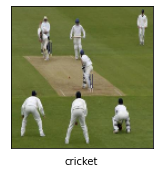

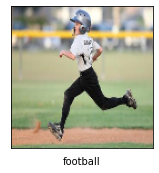

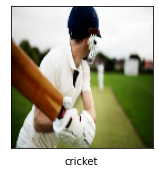

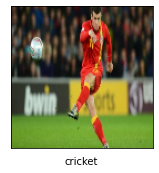

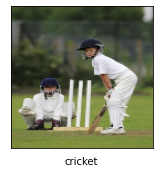

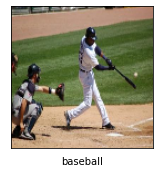

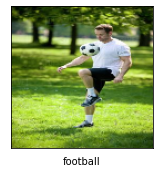

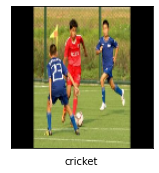

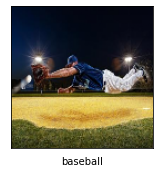

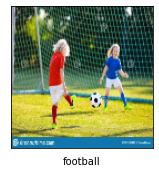

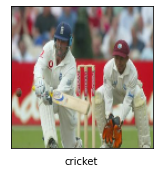

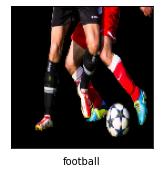

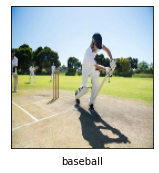

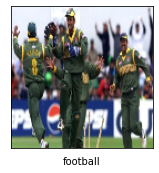

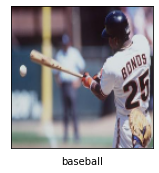

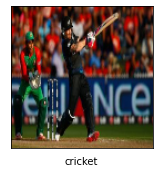

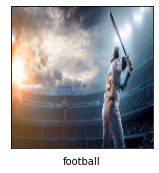

In [12]:
preds_tl = tl_model.predictions(test, TARGETS)

In [14]:
true = [1,0,2,2,1,1,0,2,2,1,0,0,1,1,2,1,1,2,0,2,0,0,2,0,1,0,1,2,1,0,2,2,0,2,1,2,1,1,0,1,0]

In [15]:
pred_rnn = 0
pred_tl = 0

for i in range(len(preds_tl)):
    if preds_rnn[i] == true[i]:
        pred_rnn += 1
    if preds_tl[i] == true[i]:
        pred_tl += 1

print('Preds convolutional network model: ', pred_rnn, 
      '\nPreds transfer learning model: ', pred_tl)
        

Preds convolutional network model:  23 
Preds transfer learning model:  31


In [16]:
#confusion matrix for tf model
confusion_matrix(true, preds_tl)

array([[ 9,  2,  2],
       [ 2, 12,  1],
       [ 1,  2, 10]], dtype=int64)

In [17]:
#confusion matrix for convolutional network model
confusion_matrix(true, preds_rnn)

array([[8, 0, 5],
       [2, 8, 5],
       [3, 3, 7]], dtype=int64)

In [18]:
import pandas as pd

pd.DataFrame(preds_rnn, columns = ['predictions']).to_csv(f'predictions/rnn_preds_size_{SIZE}_batch_{BATCH_SIZE}_epochs_{EPOCHS}.csv', index=False)
pd.DataFrame(preds_tl, columns = ['predictions']).to_csv(f'predictions/tl_preds_size_{SIZE}_batch_{BATCH_SIZE}_epochs_{EPOCHS}.csv', index=False)